# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

# Observations:
1. Max temperature is the variable that shows a prominent observable trend. As the latitude go toward far ends the max temperature tends to start dropping. For most locations near the equatar, in range -20 to 40, the temperature reach max values.
2. Humidity, Cloudiness and Windspeed are quiet variable from location to location and do not show an observable trend with latitude coordinates.
3. The goodness of fit (R-squared) for humidity, cloudiness and windspeed is also very low explaining high variance in data.
4. For humidity it can be observed that southern hemisphere usually has more number of cities with high humidity. This can be a data bias as there more number of cities in northern hemisphere dataframe as compared to southern hemipshere

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
# Spliting "cities" list into sub lists of 50 cities for processing in sets
n = 50   
city_subset = [cities[i * n:(i + 1) * n] for i in range((len(cities) + n - 1) // n )]

In [203]:
# Defining units to convert Temp to F from Kalvin and Wind Speed to MPH
units = "imperial"

# Defining lists for conversions to data frame
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Setting date of analysis to display in graphs
analysis_date = time.strftime("%m/%d/%Y", time.gmtime())

# Printing initial working sequence
print ("Beginning Data Retrieval")   
print ("-----------------------------")

# Running a loop to split city_subset into multiple cities list
for citi in city_subset:
    
    # Setting variable to know which set the program is running
    sett = city_subset.index(citi)
    
    # Running api request for city in every sublist of containing 50 cities
    for city in citi:
        
        # Running api request and getting data
        query_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units={units}"
        response = requests.get(query_url)
        response_json = response.json()

        # Trying to append data to list variable generated above
        try:
            # Printing is city found
            print(f"Processing Record {citi.index(city)} of Set {sett} | {city}")
            
            # Appending data to lists
            city = response_json["name"]
            city_name.append(city)

            cloud = response_json["clouds"]["all"]
            cloudiness.append(cloud)

            country_name = response_json["sys"]["country"]
            country.append(country_name)

            time = response_json["dt"]
            date.append(time)

            humid = response_json["main"]["humidity"]
            humidity.append(humid)

            lati = response_json["coord"]["lat"]
            lat.append(lati)

            long = response_json["coord"]["lon"]
            lng.append(long)

            max_t = response_json["main"]["temp_max"]
            max_temp.append(max_t)

            wind_s = response_json["wind"]["speed"]
            wind_speed.append(wind_s)
        
        # Printing if city not found
        except KeyError:
            print(f'{city} city not found. Skipping...')

# Printing final sequence once all cities data has been retrieved 
print("-----------------------------")
print("Data Retrieval Complete")     
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 0 of Set 0 | khatanga
Processing Record 1 of Set 0 | fort atkinson
Processing Record 2 of Set 0 | vaitupu
vaitupu city not found. Skipping...
Processing Record 3 of Set 0 | port alfred
Processing Record 4 of Set 0 | butaritari
Processing Record 5 of Set 0 | cape town
Processing Record 6 of Set 0 | ushuaia
Processing Record 7 of Set 0 | norwich
Processing Record 8 of Set 0 | albany
Processing Record 9 of Set 0 | zhigansk
Processing Record 10 of Set 0 | busselton
Processing Record 11 of Set 0 | dikson
Processing Record 12 of Set 0 | port elizabeth
Processing Record 13 of Set 0 | lebu
Processing Record 14 of Set 0 | burnie
Processing Record 15 of Set 0 | cayenne
Processing Record 16 of Set 0 | mar del plata
Processing Record 17 of Set 0 | rikitea
Processing Record 18 of Set 0 | kaitangata
Processing Record 19 of Set 0 | saint-philippe
Processing Record 20 of Set 0 | codrington
Processing Record 21 of Set 0 | plastun


Processing Record 37 of Set 3 | verkhnevilyuysk
Processing Record 38 of Set 3 | vangaindrano
Processing Record 39 of Set 3 | namatanai
Processing Record 40 of Set 3 | lodja
Processing Record 41 of Set 3 | aswan
Processing Record 42 of Set 3 | tingo maria
Processing Record 43 of Set 3 | meyungs
meyungs city not found. Skipping...
Processing Record 44 of Set 3 | khani
Processing Record 45 of Set 3 | galle
Processing Record 46 of Set 3 | pangnirtung
Processing Record 47 of Set 3 | naze
Processing Record 48 of Set 3 | itanhaem
Processing Record 49 of Set 3 | tual
Processing Record 0 of Set 4 | springfield
Processing Record 1 of Set 4 | calama
Processing Record 2 of Set 4 | atar
Processing Record 3 of Set 4 | castro
Processing Record 4 of Set 4 | ponta do sol
Processing Record 5 of Set 4 | mizan teferi
Processing Record 6 of Set 4 | tuktoyaktuk
Processing Record 7 of Set 4 | port-de-paix
port-de-paix city not found. Skipping...
Processing Record 8 of Set 4 | nianzishan
Processing Record 9 o

Processing Record 20 of Set 7 | cruzeiro do sul
Processing Record 21 of Set 7 | mendi
Processing Record 22 of Set 7 | vestmannaeyjar
Processing Record 23 of Set 7 | itoman
Processing Record 24 of Set 7 | cascais
Processing Record 25 of Set 7 | richards bay
Processing Record 26 of Set 7 | tommot
Processing Record 27 of Set 7 | jalu
Processing Record 28 of Set 7 | stawell
Processing Record 29 of Set 7 | samalaeulu
samalaeulu city not found. Skipping...
Processing Record 30 of Set 7 | saint-augustin
Processing Record 31 of Set 7 | altay
Processing Record 32 of Set 7 | whitehorse
Processing Record 33 of Set 7 | bathsheba
Processing Record 34 of Set 7 | santa vitoria do palmar
Processing Record 35 of Set 7 | colorado springs
Processing Record 36 of Set 7 | mahebourg
Processing Record 37 of Set 7 | kahului
Processing Record 38 of Set 7 | vernon
Processing Record 39 of Set 7 | mawlaik
Processing Record 40 of Set 7 | mahibadhoo
Processing Record 41 of Set 7 | quatre cocos
Processing Record 42 

Processing Record 1 of Set 11 | sinnamary
Processing Record 2 of Set 11 | andenes
Processing Record 3 of Set 11 | ballybofey
Processing Record 4 of Set 11 | havelock
Processing Record 5 of Set 11 | scottsbluff
Processing Record 6 of Set 11 | shimoda
Processing Record 7 of Set 11 | pasvalys
Processing Record 8 of Set 11 | durban
Processing Record 9 of Set 11 | nizhneyansk
nizhneyansk city not found. Skipping...
Processing Record 10 of Set 11 | aras
Processing Record 11 of Set 11 | le pradet
Processing Record 12 of Set 11 | ovada
Processing Record 13 of Set 11 | aykhal
Processing Record 14 of Set 11 | grimari
grimari city not found. Skipping...
Processing Record 15 of Set 11 | sorland
Processing Record 16 of Set 11 | nome
Processing Record 17 of Set 11 | deputatskiy
Processing Record 18 of Set 11 | houma
Processing Record 19 of Set 11 | pontianak
Processing Record 20 of Set 11 | alice springs
Processing Record 21 of Set 11 | saint-pierre
Processing Record 22 of Set 11 | port shepstone
Pr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [332]:
# Creating dictionary and assigning relevent data lists
data = {"City": city_name,
"Cloudiness": cloudiness,
"Country": country,      
"Date": date,     
"Humidity": humidity,      
"Lat": lat,           
"Lng": lng,           
"Max Temp": max_temp,     
"Wind Speed": wind_speed    
}

# Creating dataframe and exporting csv file
weather_df = pd.DataFrame(data)
weather_df.to_csv(output_data_file,index = True, header = True)
weather_df.count()

City          556
Cloudiness    556
Country       556
Date          556
Humidity      556
Lat           556
Lng           556
Max Temp      556
Wind Speed    556
dtype: int64

In [239]:
# Printing dataframe top 5 rows
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Khatanga,99,RU,1592462926,34,71.97,102.50,59.02,4.70
1,Fort Atkinson,0,US,1592462926,73,42.93,-88.84,64.00,4.29
2,Port Alfred,0,ZA,1592463086,72,-33.59,26.89,55.99,8.28
3,Butaritari,2,KI,1592462927,66,3.07,172.79,83.57,8.57
4,Cape Town,0,ZA,1592463087,58,-33.93,18.42,53.60,5.82


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

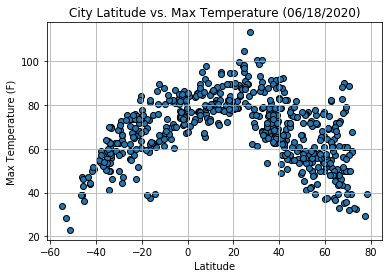

In [327]:
# Difining dataframe column and row for plotting
x_lat = weather_df.Lat
y_temp = weather_df["Max Temp"]

# Plotting scatter plot and formatting
plt.scatter(x_lat,y_temp, marker = "o", edgecolors = "black")
plt.title(f"City Latitude vs. Max Temperature ({analysis_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

# Printing and exporting results
plt.savefig('../output_data/temp_lat.png')
plt.show()

#### Code Analysis: 
The code is plotting the latitude coordinates and their respective location's max temperature showing a trend between max temperature and latitude. 

#### Latitude vs. Humidity Plot

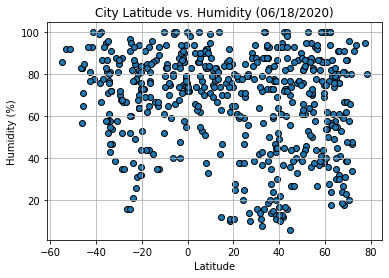

In [328]:
# Difining dataframe column for plotting
y_hum = weather_df["Humidity"]

# Plotting scatter plot and formatting
plt.scatter(x_lat,y_hum, marker = "o", edgecolors = "black")
plt.title(f"City Latitude vs. Humidity ({analysis_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Printing and exporting results
plt.savefig('../output_data/humid_lat.png')
plt.show()

#### Code Analysis: 
The code is plotting the latitude coordinates and their respective location's humidity trying to show a trend between humidity and latitude.

#### Latitude vs. Cloudiness Plot

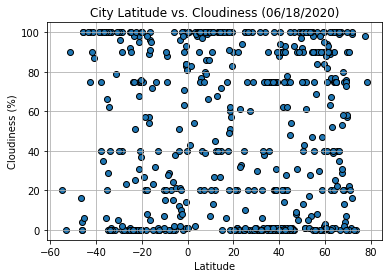

In [329]:
# Difining dataframe column for plotting
y_cloud = weather_df["Cloudiness"]

# Plotting scatter plot and formatting
plt.scatter(x_lat,y_cloud, marker = "o", edgecolors = "black")
plt.title(f"City Latitude vs. Cloudiness ({analysis_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Printing and exporting results
plt.savefig('../output_data/cloud_lat.png')
plt.show()

#### Code Analysis: 
The code is plotting the latitude coordinates and their respective location's cloudiness trying to show a trend between cloudiness and latitude.

#### Latitude vs. Wind Speed Plot

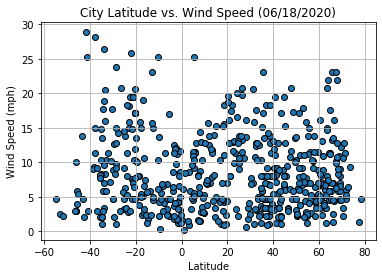

In [330]:
# Difining dataframe column for plotting
y_ws = weather_df["Wind Speed"]

# Plotting scatter plot and formatting
plt.scatter(x_lat,y_ws, marker = "o", edgecolors = "black")
plt.title(f"City Latitude vs. Wind Speed ({analysis_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

# Printing and exporting results
plt.savefig('../output_data/wind_lat.png')
plt.show()

#### Code Analysis: 
The code is plotting the latitude coordinates and their respective location's wind speed trying to show a trend between wind speed and latitude.

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


In [264]:
# Creating Northern and Southern Hemisphere DataFrames
weather_df_north = weather_df[weather_df["Lat"] >= 0]
weather_df_south = weather_df[weather_df["Lat"] < 0]

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
2,Port Alfred,0,ZA,1592463086,72,-33.59,26.89,55.99,8.28
4,Cape Town,0,ZA,1592463087,58,-33.93,18.42,53.60,5.82
5,Ushuaia,20,AR,1592462802,86,-54.80,-68.30,33.80,4.70
9,Busselton,1,AU,1592462929,91,-33.65,115.33,57.00,16.02
11,Port Elizabeth,0,ZA,1592462929,81,-33.92,25.57,50.00,3.36
...,...,...,...,...,...,...,...,...,...
540,Nosy Varika,76,MG,1592463275,76,-20.58,48.53,67.33,6.42
546,São Desidério,0,BR,1592463276,89,-12.36,-44.97,63.39,5.01
548,Carira,7,BR,1592463278,100,-10.36,-37.70,64.67,6.15
550,Winburg,2,ZA,1592463279,68,-28.52,27.01,44.60,9.15


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4342292163624567


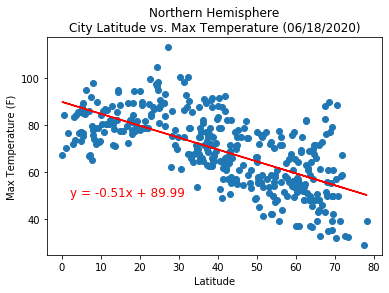

In [300]:
# Defining variables
x_lat_n = weather_df_north.Lat
y_temp_n = weather_df_north["Max Temp"]

# Plotting scatter plot
plt.scatter(x_lat_n,y_temp_n)

# Running regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat_n,y_temp_n)
n_regress_val_temp = x_lat_n*slope + intercept
line_eq_n_temp = f"y = {round(slope,2)}x + {round(intercept,2)}"
r_sqr_n_temp = rvalue**2

# Plotting regression line and equation
plt.plot(x_lat_n, n_regress_val_temp, "r-")
plt.annotate(line_eq_n_temp, (2,50), fontsize = 12, color = "red")

# Formating scatter plot
plt.title(f"Northern Hemisphere\nCity Latitude vs. Max Temperature ({analysis_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Printing results
print(f"The r-squared is: {r_sqr_n_temp}")
plt.show()

#### Code Analysis:
The linear regression is mapping the relationship between latitude and max temperature. As the latitude coordinates increase the temperature goes down, meaning the further you are from equator the temperature goes down, represented by a regression line and its equation. The r-squared represents the goodness of fit of data showing less variability as compared to other models that we have examined.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5592385493815251


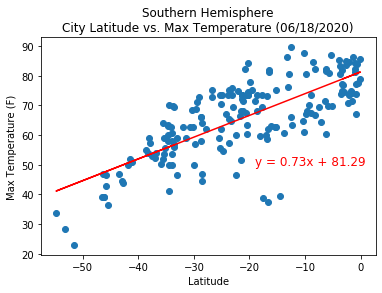

In [305]:
# Defining variables
x_lat_s = weather_df_south.Lat
y_temp_s = weather_df_south["Max Temp"]

# Plotting scatter plot
plt.scatter(x_lat_s,y_temp_s)

# Running regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat_s,y_temp_s)
s_regress_val_temp = x_lat_s*slope + intercept
line_eq_s_temp = f"y = {round(slope,2)}x + {round(intercept,2)}"
r_sqr_s_temp = rvalue**2

# Plotting regression line and equation
plt.plot(x_lat_s, s_regress_val_temp, "r-")
plt.annotate(line_eq_s_temp, (-19,50), fontsize = 12, color = "red")

# Formating scatter plot
plt.title(f"Southern Hemisphere\nCity Latitude vs. Max Temperature ({analysis_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Printing results
print(f"The r-squared is: {r_sqr_s_temp}")
plt.show()

#### Code Analysis:
The linear regression is mapping the relationship between latitude and max temperature. As the latitude coordinates decrease the temperature goes down, meaning the further you are from equator the temperature goes down, represented by a regression line and its equation. The r-squared represents the goodness of fit of data showing less variability as compared to other models that we have examined.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.01096441060787265


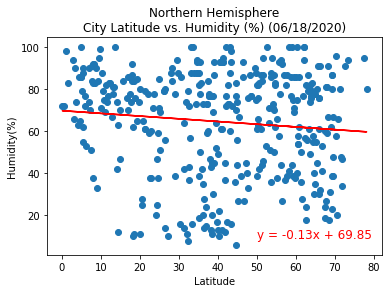

In [308]:
# Defining variable
y_hum_n = weather_df_north["Humidity"]

# Plotting scatter plot
plt.scatter(x_lat_n,y_hum_n)

# Running regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat_n,y_hum_n)
n_regress_val_hum = x_lat_n*slope + intercept
line_eq_n_hum = f"y = {round(slope,2)}x + {round(intercept,2)}"
r_sqr_n_hum = rvalue**2

# Plotting regression line and equation
plt.plot(x_lat_n, n_regress_val_hum, "r-")
plt.annotate(line_eq_n_hum, (50,9), fontsize = 12, color = "red")

# Formating scatter plot
plt.title(f"Northern Hemisphere\nCity Latitude vs. Humidity (%) ({analysis_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")

# Printing results
print(f"The r-squared is: {r_sqr_n_hum}")
plt.show()

#### Code Analysis:
The linear regression is mapping the relationship between latitude and humidity. As the latitude coordinates increase the humidity goes down, meaning the further you are from equator the humidity goes down, represented by a regression line and its equation. However the change in humidity is very less. The r-squared represents the goodness of fit of data showing high variability as the value is close to 0.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0002963649782430069


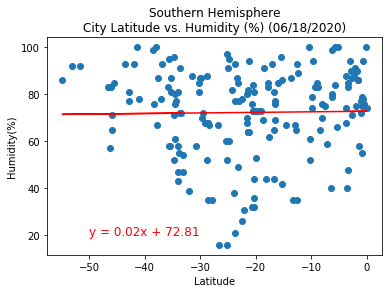

In [311]:
# Defining variables
y_hum_s = weather_df_south["Humidity"]

# Plotting scatter plot
plt.scatter(x_lat_s,y_hum_s)

# Running regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat_s,y_hum_s)
s_regress_val_hum = x_lat_s*slope + intercept
line_eq_s_hum = f"y = {round(slope,2)}x + {round(intercept,2)}"
r_sqr_s_hum = rvalue**2

# Plotting regression line and equation
plt.plot(x_lat_s, s_regress_val_hum, "r-")
plt.annotate(line_eq_s_hum, (-50,20), fontsize = 12, color = "red")

# Formating scatter plot
plt.title(f"Southern Hemisphere\nCity Latitude vs. Humidity (%) ({analysis_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")

# Printing results
print(f"The r-squared is: {r_sqr_s_hum}")
plt.show()

#### Code Analysis:
The linear regression is mapping the relationship between latitude and humidity. As the latitude coordinates decrease the humidity goes down, meaning the further you are from equator the humidity goes down, represented by a regression line and its equation. However the change in humidity is very less. The r-squared represents the goodness of fit of data showing high variability as the value is close to 0.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0012891193936939366


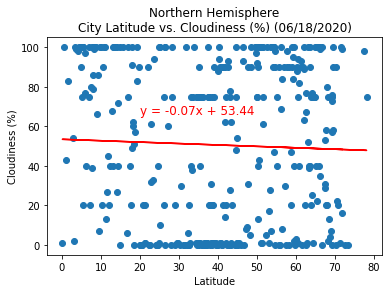

In [316]:
# Defining variables
y_cloud_n = weather_df_north["Cloudiness"]

# Plotting scatter plot
plt.scatter(x_lat_n,y_cloud_n)

# Running regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat_n,y_cloud_n)
n_regress_val_cloud = x_lat_n*slope + intercept
line_eq_n_cloud = f"y = {round(slope,2)}x + {round(intercept,2)}"
r_sqr_n_cloud = rvalue**2

# Plotting regression line and equation
plt.plot(x_lat_n, n_regress_val_cloud, "r-")
plt.annotate(line_eq_n_cloud, (20,66), fontsize = 12, color = "red")

# Formating scatter plot
plt.title(f"Northern Hemisphere\nCity Latitude vs. Cloudiness (%) ({analysis_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Printing results
print(f"The r-squared is: {r_sqr_n_cloud}")
plt.show()

#### Code Analysis:
The linear regression is mapping the relationship between latitude and cloudiness. As the latitude coordinates decrease the cloudiness goes down, meaning the further you are from equator the cloudiness goes down, represented by a regression line and its equation. However the change in cloudiness is very less. The r-squared represents the goodness of fit of data showing high variability as the value is close to 0.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.003747487104603266


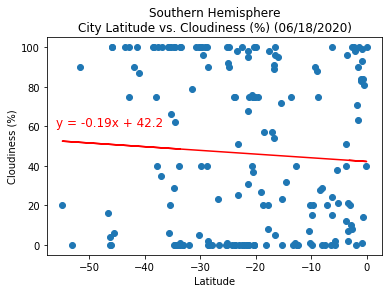

In [321]:
# Defining variables
y_cloud_s = weather_df_south["Cloudiness"]

# Plotting scatter plot
plt.scatter(x_lat_s,y_cloud_s)

# Running regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat_s,y_cloud_s)
s_regress_val_cloud = x_lat_s*slope + intercept
line_eq_s_cloud = f"y = {round(slope,2)}x + {round(intercept,2)}"
r_sqr_s_cloud = rvalue**2

# Plotting regression line and equation
plt.plot(x_lat_s, s_regress_val_cloud, "r-")
plt.annotate(line_eq_s_cloud, (-56,60), fontsize = 12, color = "red")

# Formatting scatter plot
plt.title(f"Southern Hemisphere\nCity Latitude vs. Cloudiness (%) ({analysis_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Printing results
print(f"The r-squared is: {r_sqr_s_cloud}")
plt.show()

#### Code Analysis:
The linear regression is mapping the relationship between latitude and cloudiness. As the latitude coordinates decrease the cloudiness goes up, meaning the further you are from equator the cloudiness goes up, represented by a regression line and its equation. However the change in cloudiness is very less. The r-squared represents the goodness of fit of data showing high variability as the value is close to 0.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.00046396905944466935


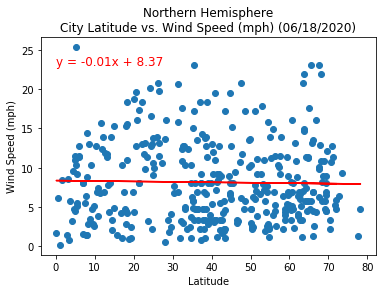

In [322]:
# Defining variables
y_wind_n = weather_df_north["Wind Speed"]

# Plotting scatter plot
plt.scatter(x_lat_n,y_wind_n)

# Running regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat_n,y_wind_n)
n_regress_val_wind = x_lat_n*slope + intercept
line_eq_n_wind = f"y = {round(slope,2)}x + {round(intercept,2)}"
r_sqr_n_wind = rvalue**2

# Plotting regression line and equation
plt.plot(x_lat_n, n_regress_val_wind, "r-")
plt.annotate(line_eq_n_wind, (0,23), fontsize = 12, color = "red")

# Formatting scatter plot
plt.title(f"Northern Hemisphere\nCity Latitude vs. Wind Speed (mph) ({analysis_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Printing results
print(f"The r-squared is: {r_sqr_n_wind}")
plt.show()

#### Code Analysis:
The linear regression is mapping the relationship between latitude and wind speed. As the latitude coordinates increase the wind speed goes down, meaning the further you are from equator the wind speed goes down, represented by a regression line and its equation. However the change in wind speed is very very less. The r-squared represents the goodness of fit of data showing high variability as the value is close to 0.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.024760563688270506


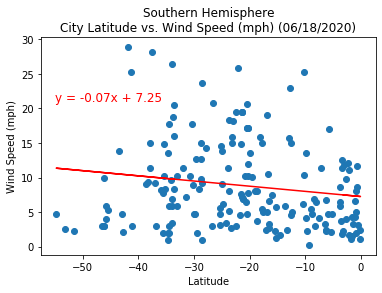

In [326]:
# Defining variables
y_wind_s = weather_df_south["Wind Speed"]

# Plotting scatter plot
plt.scatter(x_lat_s,y_wind_s)

# Running regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat_s,y_wind_s)
s_regress_val_wind = x_lat_s*slope + intercept
line_eq_s_wind = f"y = {round(slope,2)}x + {round(intercept,2)}"
r_sqr_s_wind = rvalue**2

# Plotting regression line and equation
plt.plot(x_lat_s, s_regress_val_wind, "r-")
plt.annotate(line_eq_s_wind, (-55,21), fontsize = 12, color = "red")

# Formatting scatter plot
plt.title(f"Southern Hemisphere\nCity Latitude vs. Wind Speed (mph) ({analysis_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Printing results
print(f"The r-squared is: {r_sqr_s_wind}")
plt.show()

#### Code Analysis:
The linear regression is mapping the relationship between latitude and wind speed. As the latitude coordinates decrease the wind speed goes up, meaning the further you are from equator the wind speed goes up, represented by a regression line and its equation. However the change in wind speed is very less. The r-squared represents the goodness of fit of data showing high variability as the value is close to 0.